In [1]:
import sympy as sym
sym.init_printing()
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import InterpolatedUnivariateSpline

In [2]:
plt.style.use('./my_style.py')
import matplotlib.ticker as mticker

from cycler import cycler
import matplotlib.cm     as cm

# Example use of solver 

In [3]:
from solver import KmouExpansionJordan

In [120]:
# initilise solver
dum_kmou = KmouExpansionJordan(beta=0.2, K0=1, lamb_val=10)

In [121]:
# dum_kmou.tune_lambda(E_target=1.105861, a_target=0.875543)
dum_kmou.tune_lambda(E_target=1, a_target=1, frame='Einstein', maxiter=10) # tune lambda to recover E=E_target in the desired frame
# dum_kmou.solve() # to compute solutions without tuning

In [122]:
dum_kmou.lamb_val

In [123]:
# create dataframe with some output quantities
df_out = pd.DataFrame(np.array(dum_kmou.eval()).T, columns=['a', 'phi', 'phi_a', 'E', 'E_a']).set_index('a')

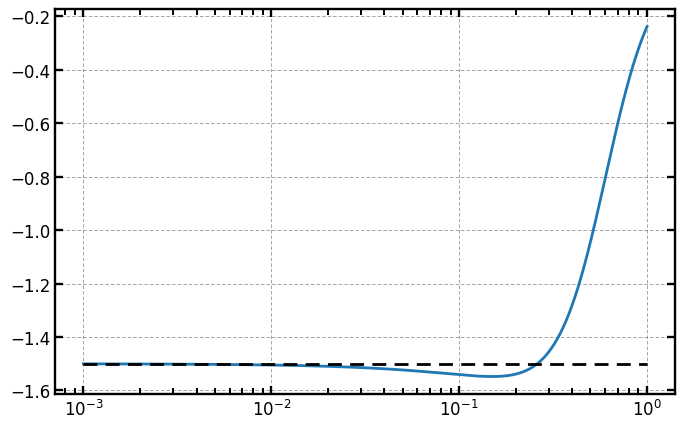

In [124]:
# Check E'/E
plt.semilogx(df_out.E_a*df_out.index/df_out.E)
plt.hlines(-3/2, 1e-3, 1, colors='k', linestyles='--')

### Comparison with Ben: $K_0=1$, $\beta=0.2$, $n=2$

In [125]:
header_str = 'a,  H_MG,  H_LCDM, H_MG/H_LCDM,  aH dH/da / H0^2 ,  phi , d phi/ dlna'
header = [s.strip(' ')for s in header_str.split(',')]

df_Ben_BG = pd.DataFrame(np.loadtxt('./Data/Background/background_k01_glam.dat'), columns=header).set_index('a')

In [126]:
df_Ben_BG['A'] = np.e**(df_Ben_BG.phi*0.2)
df_Ben_BG['a_J'] = df_Ben_BG['A']*df_Ben_BG.index

In [127]:
a_E = np.logspace(-4,0,1000)
a_J = dum_kmou.get_a_Jor(a_E)

In [136]:
df_out = pd.DataFrame(np.array(dum_kmou.eval(a_vals=a_J)).T, columns=['a', 'phi', 'phi_a', 'H_MG', 'E_a']).set_index('a')

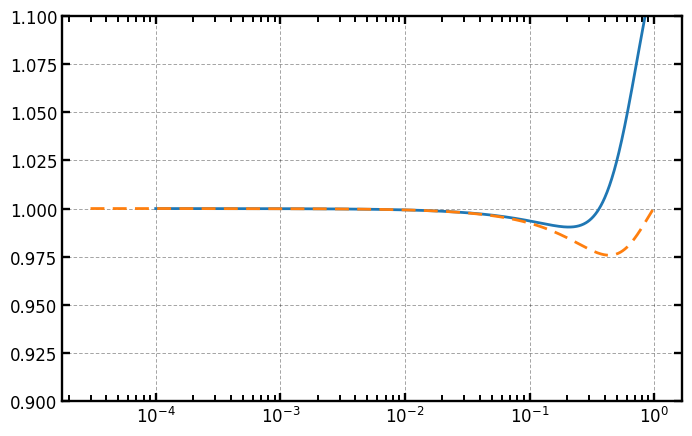

In [138]:
plt.semilogx((df_out['H_MG']/dum_kmou.E_LCDM_fun(a_E)))
plt.semilogx((df_Ben_BG['H_MG']/df_Ben_BG['H_LCDM']),'--')
plt.ylim(0.9,1.1)

# Compute growth factor

In [139]:
dum_kmou.get_growth()

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 3.000e-05  8.143e-05 ...  8.735e-01  1.000e+00]
        y: [[ 1.000e+00  1.000e+00 ...  5.259e-01  4.066e-01]
            [ 3.000e-05  8.143e-05 ...  8.461e-01  9.048e-01]]
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x143f84590>
 t_events: None
 y_events: None
     nfev: 218
     njev: 0
      nlu: 0

In [140]:
dum_kmou.get_growth_LCDM()

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 3.000e-05  2.695e-02 ...  9.528e-01  1.000e+00]
        y: [[ 1.000e+00  1.000e+00 ...  4.418e-01  4.089e-01]
            [ 3.000e-05  2.695e-02 ...  7.642e-01  7.843e-01]]
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x142cbb590>
 t_events: None
 y_events: None
     nfev: 80
     njev: 0
      nlu: 0

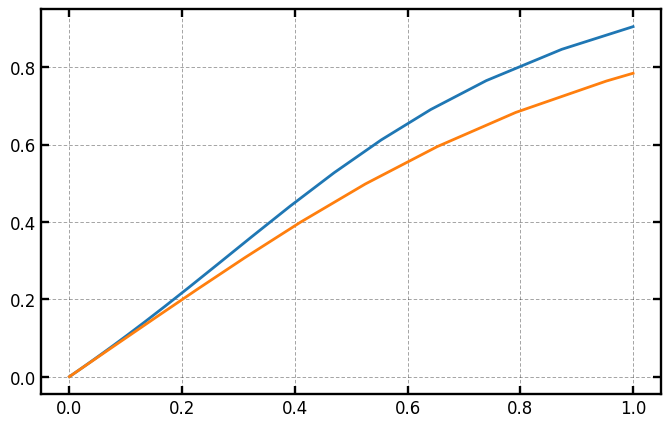

In [141]:
plt.plot(dum_kmou.D_kmou_J['t'],dum_kmou.D_kmou_J['y'][1])
plt.plot(dum_kmou.D_LCDM['t'],dum_kmou.D_LCDM['y'][1])


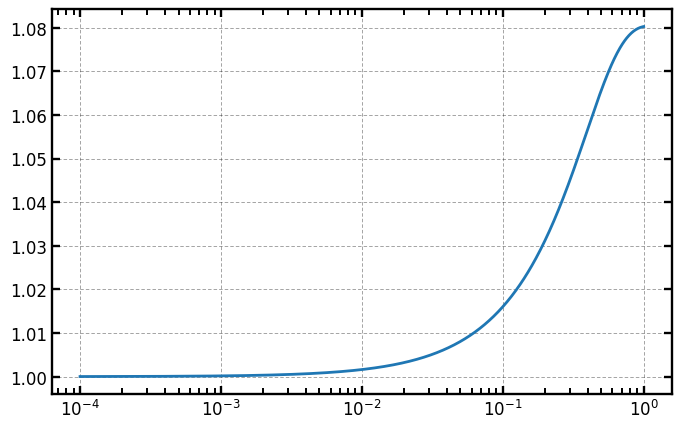

In [144]:
# produce familiar growth ratio with LCDM
a_E = np.logspace(-4,0,1000)
a_J = dum_kmou.get_a_Jor(a_E)

plt.semilogx(a_E , dum_kmou.D_kmou_J.sol(a_J)[1]/dum_kmou.D_LCDM.sol(a_E)[1])
